In [3]:
import numpy as np
import pandas as pd
import cv2
import random
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from tqdm import tqdm
from inkmlparser import InkMLParser
from boundingbox import BoundingBoxUtils
from ssdboxes import SSDBoxes


In [5]:
folders = os.listdir("./data/train/")

equations = []
files = []

folders = [folders[0]]

for folder in folders:
    folder_files = os.listdir("./data/train/" + folder + "/")
    for ff in folder_files:
        files.append("./data/train/" + folder + "/" + ff)

parser = InkMLParser()

for file in tqdm(files):
    equation = parser.inkml_to_labelled_image(file)
    if (not equation == None):
        equations.append(equation)

100%|██████████| 921/921 [00:08<00:00, 108.29it/s]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


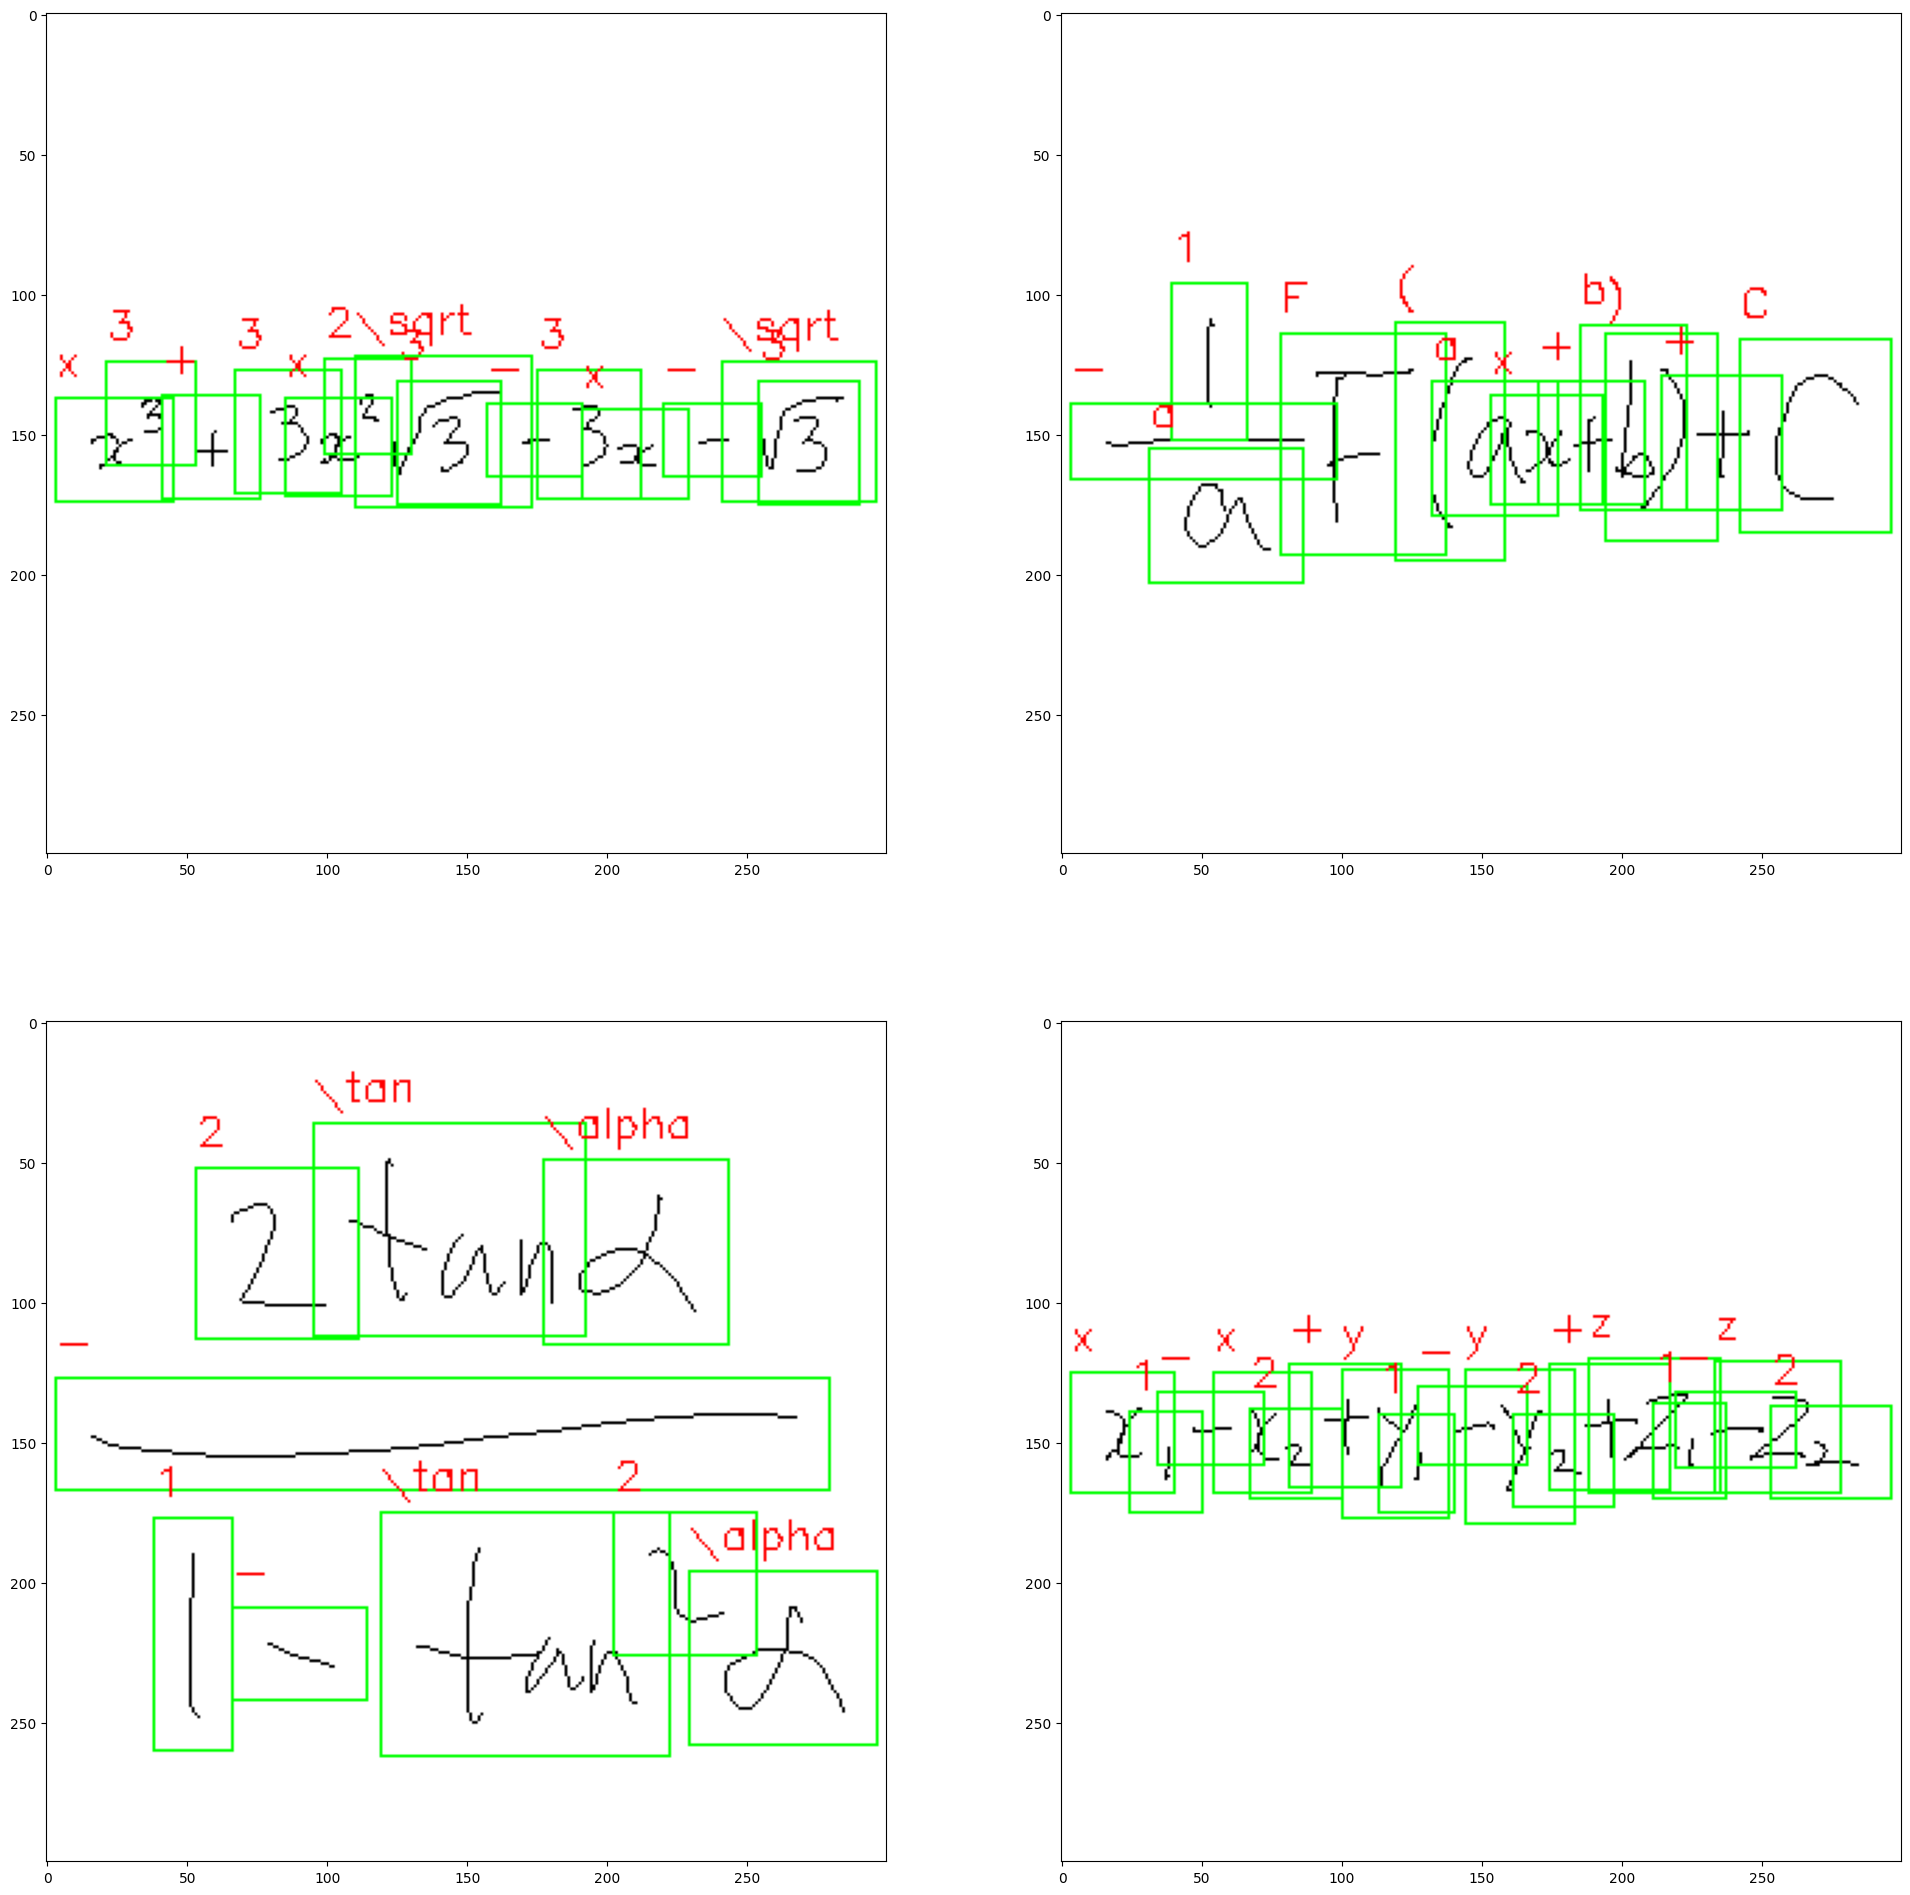

In [6]:

fig = plt.figure(figsize=([24, 24]))

for i in range(4):
    fig.add_subplot(2, 2, i + 1)

    index = random.randint(0, len(equations) - 1)
    equation = equations[index]
    
    img = BoundingBoxUtils.draw_bounding_box(1 - equation[0], equation[2], labels=equation[1])

    plt.imshow(img)

In [9]:
def create_data(equations):
    img, labels, boxes = [], [], []

    default_boxes = SSDBoxes.create_default_boxes()

    for equation in tqdm(equations):
        img.append(equation[0])
        labels.append(equation[1])
        boxes.append(BoundingBoxUtils.normalize(equation[2], equation[0].shape))
        gt_boxes, matches = SSDBoxes.match_to_default_boxes(equation[2], equation[1], default_boxes)

    img = np.array(img)

create_data(equations)
    

#     show_img(img,label)
#     feature_box = create_df_box(feature_layers)
#     feature_box = convert_scale(feature_box,'abs')
#     feature_box_conv = convert_format(feature_box,'x1y1x2y2')
#     iou_matrix = iou(feature_box_conv,np.array(label)[:,:4])
#     gt_box,matched = df_match(convert_format(np.array(label),'xywh'),iou_matrix)
#     # gt_box xywh
#     print(tf.math.count_nonzero(matched))
#     pre_process_img(img,convert_format(feature_box,'x1y1x2y2'),matched)
#     boxes=gt_box[:,:4]
#     classes = gt_box[:,4]
#     classes = tf.cast(classes+1, dtype=tf.int32) #0 for background class
#     matched = tf.cast(matched,dtype=tf.int32)
#     classes = tf.cast(classes*matched,dtype=tf.int32)
#     classes = tf.one_hot(classes,depth=nClasses+1,dtype=tf.float32)
#     normalised_gtbox = normalised_ground_truth(boxes,feature_box,'encode')  
#     normalised_gtbox = normalised_ground_truth(normalised_gtbox,feature_box,'decode')
#     df_box = tf.concat((normalised_gtbox,classes),axis=-1)
#     return df_box

# df_box = create_data(data)

100%|██████████| 921/921 [01:03<00:00, 14.43it/s]
